## Dependencies, Set up and clean the raw data

In [458]:
import warnings
warnings.filterwarnings('ignore')

In [459]:
# descrenpencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [460]:
# Create a file path
data = Path("../Project1/ds_salaries.csv")

# Read in the data
raw_data_df = pd.read_csv(data)

print(raw_data_df.columns)
raw_data_df

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [461]:
#Clean Upped Data(drop all empty rows, only showing columns we need, sort columns to addapt to the scope of the analysis)
organized_data_df=raw_data_df[["job_title","work_year","experience_level","remote_ratio","company_size","salary","salary_in_usd"]]
organized_data_df.dropna(subset=["job_title","work_year","experience_level","remote_ratio","company_size","salary","salary_in_usd"], inplace=True)

organized_data_df



,job_title,work_year,experience_level,remote_ratio,company_size,salary,salary_in_usd
0,Principal Data Scientist,2023,SE,100,L,80000,85847
1,ML Engineer,2023,MI,100,S,30000,30000
2,ML Engineer,2023,MI,100,S,25500,25500
3,Data Scientist,2023,SE,100,M,175000,175000
4,Data Scientist,2023,SE,100,M,120000,120000
...,...,...,...,...,...,...,...
3750,Data Scientist,2020,SE,100,L,412000,412000
3751,Principal Data Scientist,2021,MI,100,L,151000,151000
3752,Data Scientist,2020,EN,100,S,105000,105000
3753,Business Data Analyst,2020,EN,100,L,100000,100000


## Job title impact on salaries

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64
-----------------------------------------------


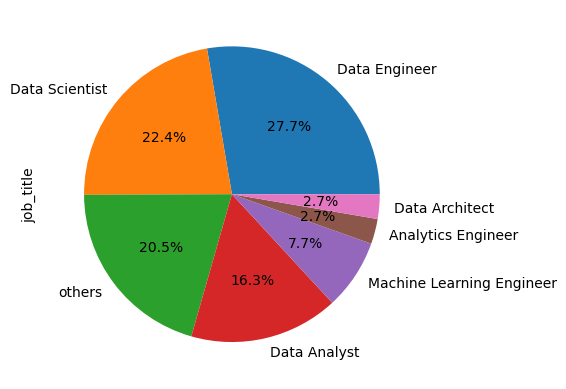

In [462]:
#Job Title
job_data=organized_data_df["job_title"].value_counts()
print(job_data)
print("-----------------------------------------------")

other_jobs=job_data.loc[job_data<=100]
other_jobs_index=other_jobs.index

for x in other_jobs_index:
    organized_data_df["job_title"] = organized_data_df["job_title"].replace(x,"others")

main_jobs_data=organized_data_df["job_title"].value_counts()
main_jobs_data.plot.pie(autopct="%1.1f%%")
plt.savefig("C:/Users/henry/Desktop/Project1/job_title_pie_chart.png")



We are only analyzing the most common job titles :['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']
----------------------------------------------------------------------------------------------------
Job title----Data Engineer mean is :142785.7346153846, median is : 135000.0
Job title----Data Scientist mean is :140869.76547619049, median is : 141525.0
Job title----Data Analyst mean is :108716.227124183, median is : 106020.0
Job title----Machine Learning Engineer mean is :154690.7266435986, median is : 150000.0
Job title----Analytics Engineer mean is :152368.63106796116, median is : 143860.0


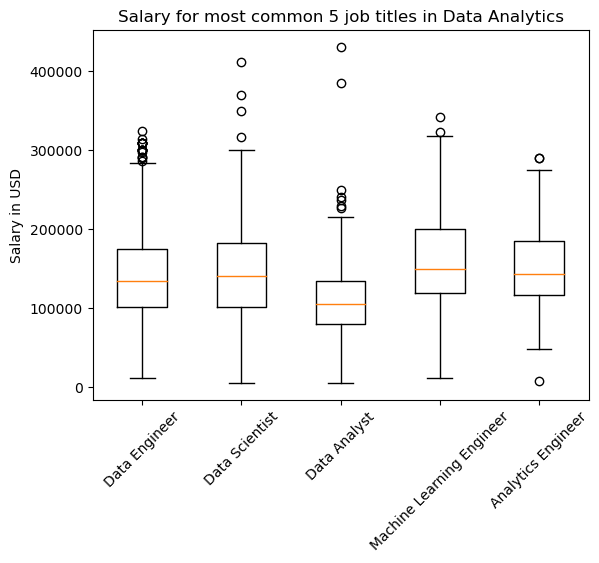

<Figure size 640x480 with 0 Axes>

In [463]:
#plot boxchart to show mean and median for selected job title

jobs=["Data Engineer","Data Scientist","Data Analyst","Machine Learning Engineer","Analytics Engineer"]
job_salary=[]
print("We are only analyzing the most common job titles :" +str(jobs))
print("----------------------------------------------------------------------------------------------------")

for x in jobs:
    salary_for_titled_job=organized_data_df.loc[organized_data_df["job_title"]==x,"salary_in_usd"]
    job_salary.append(salary_for_titled_job)
    
    print("Job title----"+ x + " mean is :"+ str(salary_for_titled_job.mean())+ "," + " median is : "+ str(salary_for_titled_job.median()) )


plt.boxplot(job_salary,labels=jobs)
plt.xticks(rotation=45)
plt.ylabel("Salary in USD")
plt.title("Salary for most common 5 job titles in Data Analytics")
plt.show()
plt.savefig("C:/Users/henry/Desktop/Project1/job_title_boxplot.png")

## Work year impact on salaries

      number of rows  average_salary  median_salary    std_salary
2020              76    92302.631579        73065.0  82370.048002
2021             230    94087.208696        80000.0  68600.465120
2022            1664   133338.620793       131300.0  58947.155520
2023            1785   149045.541176       143860.0  61307.711442


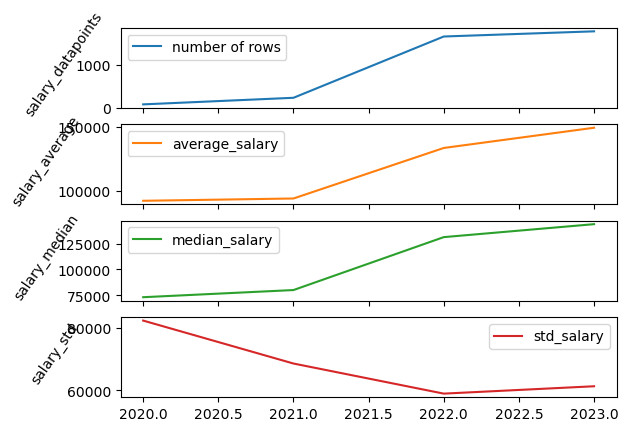

<Figure size 640x480 with 0 Axes>

In [464]:
#work year data
work_year_df=pd.DataFrame({"number of rows":organized_data_df["work_year"].value_counts(),
                            "average_salary":organized_data_df.groupby("work_year")["salary_in_usd"].mean(),
                           "median_salary":organized_data_df.groupby("work_year")["salary_in_usd"].median(),
                           "std_salary":organized_data_df.groupby("work_year")["salary_in_usd"].std()})
print(work_year_df)

axes=work_year_df.plot(subplots=True)
axes[0].set_ylabel("salary_datapoints",rotation=55)
axes[1].set_ylabel("salary_average",rotation=55)
axes[2].set_ylabel("salary_median",rotation=55)
axes[3].set_ylabel("salary_std",rotation=55)
plt.show()
plt.savefig("C:/Users/henry/Desktop/Project1/work_year_line_chart.png")


          Years         salary
work_year                     
2020       2020   92302.631579
2021       2021   94087.208696
2022       2022  133338.620793
2023       2023  149045.541176


ValueError: ((4,), (1,))

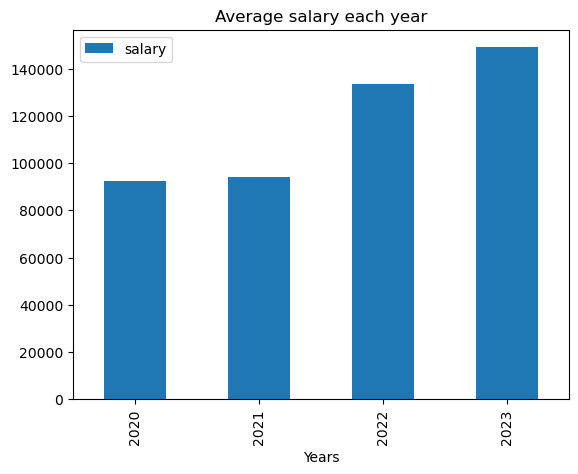

In [465]:
#anticipated average salary in 2024
years = ["2020", "2021", "2022", "2023"]
salary = organized_data_df.groupby("work_year")["salary_in_usd"].mean()
regression_df=pd.DataFrame({"Years":years,"salary":salary})
print(regression_df)

lr = Ridge()
lr.fit(regression_df[["Years"]], regression_df["salary"])
ax = regression_df.plot(x="Years", y="salary", kind="bar", title="Average salary each year")
ax.plot(regression_df["Years"], lr.coef_*regression_df["Years"]+lr.intercept_,color="orange")
plt.show()
plt.savefig("C:/Users/henry/Desktop/Project1/work_year_bar_regression.png")


# print("based of the linear regression model, the average salary in 2024 is")
 

## Experience Level impact on salaries

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64
     experience_level  salary_in_usd
0                  SE          85847
1                  MI          30000
2                  MI          25500
3                  SE         175000
4                  SE         120000
...               ...            ...
3750               SE         412000
3751               MI         151000
3752               EN         105000
3753               EN         100000
3754               SE          94665

[3755 rows x 2 columns]


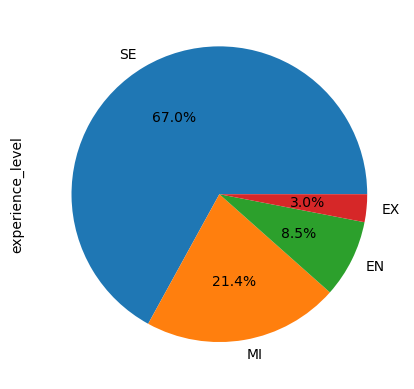

In [ ]:
#experience level
experience_data = organized_data_df["experience_level"].value_counts()
experience_data_index=experience_data.index
print(experience_data)
experience_data_df=organized_data_df[["experience_level","salary_in_usd"]]
print(experience_data_df)

experience_data.plot.pie(autopct="%1.1f%%")
plt.savefig("C:/Users/henry/Desktop/Project1/experience_level_pie_chart.png")


The median for SE is 146000.0 ,the 75 percentile for SE is 185900.0
The median for MI is 100000.0 ,the 75 percentile for MI is 135000.0
The median for EN is 70000.0 ,the 75 percentile for EN is 110009.25
The median for EX is 196000.0 ,the 75 percentile for EX is 239000.0


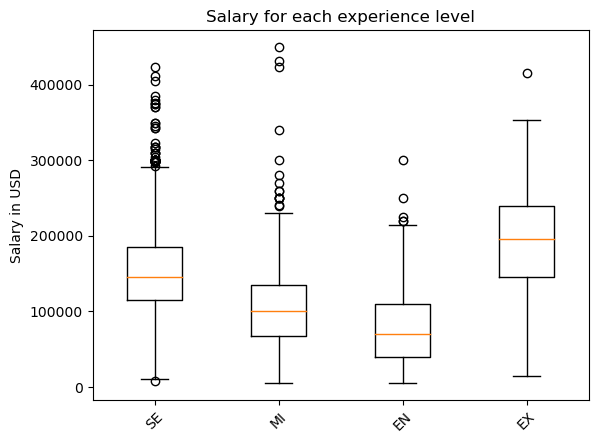

<Figure size 640x480 with 0 Axes>

In [ ]:
#boxplot for salaries for each experence level
levels=experience_data_index
level_salary=[]

for x in experience_data_index:
    salary_for_levels=organized_data_df.loc[organized_data_df["experience_level"]==x,"salary_in_usd"]
    
    quartiles = salary_for_levels.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    level_salary.append(salary_for_levels)

    print("The median for "+ x +" is "+str(quartiles[0.5])+" ,the 75 percentile for "+ x +" is "+ str(upperq))

plt.boxplot(level_salary,labels=levels)
plt.xticks(rotation=45)
plt.ylabel("Salary in USD")
plt.title("Salary for each experience level")
plt.show()
plt.savefig("C:/Users/henry/Desktop/Project1/experience_level_boxplot.png")

## Remote impact on salaries

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64
      remote_ratio  salary_in_usd
0              100          85847
1              100          30000
2              100          25500
3              100         175000
4              100         120000
...            ...            ...
3750           100         412000
3751           100         151000
3752           100         105000
3753           100         100000
3754            50          94665

[3755 rows x 2 columns]


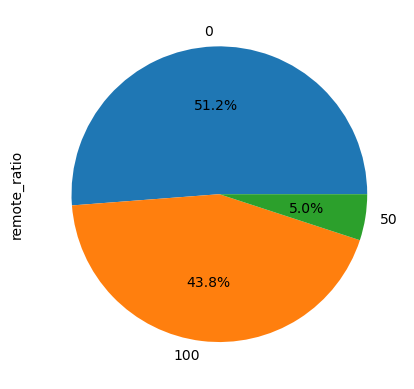

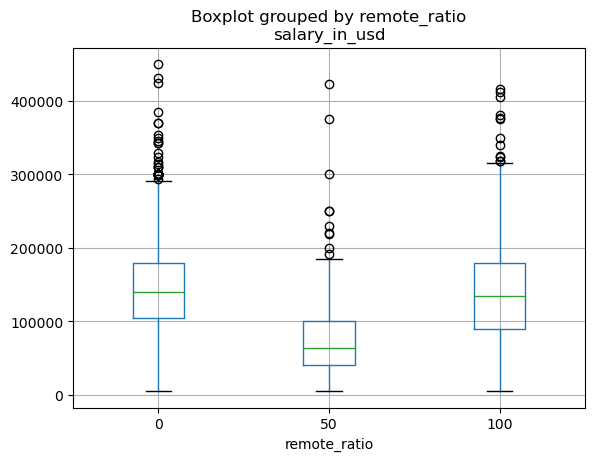

In [ ]:
#Remote Data
remote_data = organized_data_df["remote_ratio"].value_counts()
print(remote_data)
remote_data_df=organized_data_df[["remote_ratio","salary_in_usd"]]
print(remote_data_df)

remote_data.plot.pie(autopct="%1.1f%%")
plt.savefig("C:/Users/henry/Desktop/Project1/remote_pie_chart.png")
remote_data_df.boxplot("salary_in_usd", by="remote_ratio")
plt.savefig("C:/Users/henry/Desktop/Project1/remote_boxplot.png")


In [ ]:
# Perform the ANOVA
remote_group0=remote_data_df[remote_data_df["remote_ratio"] == 0]["salary_in_usd"]
remote_group1=remote_data_df[remote_data_df["remote_ratio"] == 50]["salary_in_usd"]
remote_group2=remote_data_df[remote_data_df["remote_ratio"] == 100]["salary_in_usd"]
stats.f_oneway(remote_group0, remote_group1, remote_group2)

F_onewayResult(statistic=99.41362048912457, pvalue=8.51738536255755e-43)

## company size impact on salaries

M    3153
L     454
S     148
Name: company_size, dtype: int64
     company_size  salary_in_usd
0               L          85847
1               S          30000
2               S          25500
3               M         175000
4               M         120000
...           ...            ...
3750            L         412000
3751            L         151000
3752            S         105000
3753            L         100000
3754            L          94665

[3755 rows x 2 columns]


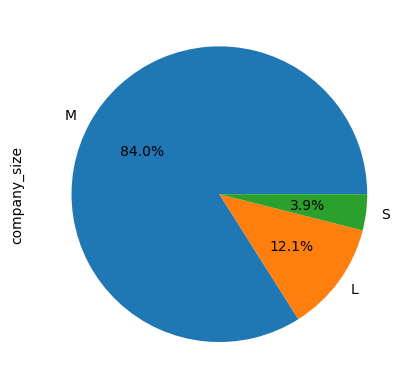

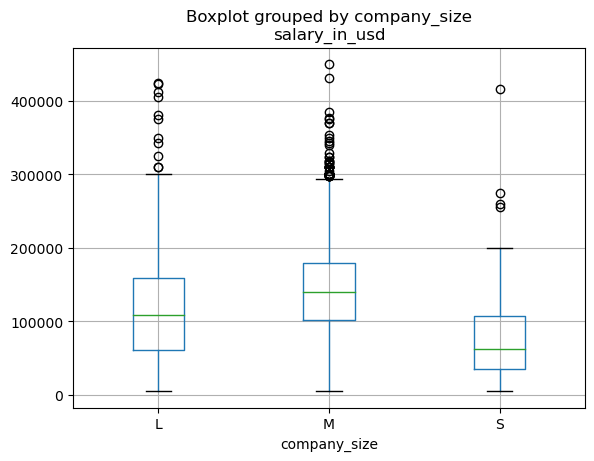

In [ ]:
# Company Size Data
company_size_data = organized_data_df["company_size"].value_counts()
print(company_size_data)

size_data_df=organized_data_df[["company_size","salary_in_usd"]]
print(size_data_df)

company_size_data.plot.pie(autopct="%1.1f%%")
plt.savefig("C:/Users/henry/Desktop/Project1/size_pie_chart.png")
size_data_df.boxplot("salary_in_usd", by="company_size")
plt.savefig("C:/Users/henry/Desktop/Project1/size_boxplot.png")

In [ ]:
# Perform the ANOVA
size_group0=size_data_df[size_data_df["company_size"]=="L"]["salary_in_usd"]
size_group1=size_data_df[size_data_df["company_size"]=="M"]["salary_in_usd"]
size_group2=size_data_df[size_data_df["company_size"]=="S"]["salary_in_usd"]
stats.f_oneway(size_group0, size_group1, size_group2)

F_onewayResult(statistic=104.4578899929138, pvalue=7.120451684531162e-45)